# Análisis Exploratorio de Datos

## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

sns.set_style("white")
import warnings
warnings.simplefilter("ignore")

## Carga de los datos limpios

In [2]:
archivo = 'BBDD_Hospitalizacion_limpio.csv'
df = pd.read_csv(archivo)
print(f'Se cargaron los datos del archivo {archivo}')

Se cargaron los datos del archivo BBDD_Hospitalizacion_limpio.csv


## Exploración inicial

In [3]:
df

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,NO,NO,5.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0
429,70,SI,NO,18.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,0,NO,NO,NO,NO,NO,NO,0,0
430,75,NO,NO,75.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
431,67,NO,NO,6.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,ADENOCARCINOMA GLEASON 6,0,NO,NO,NO,NO,NO,NO,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       433 non-null    int64  
 1   diabetes                   433 non-null    object 
 2   hospitaliz_ult_mes         433 non-null    object 
 3   psa                        433 non-null    float64
 4   biopsias_prev              433 non-null    object 
 5   vol_prostatico             433 non-null    object 
 6   antibiotico_en_profilaxis  433 non-null    object 
 7   nro_muestras               433 non-null    int64  
 8   cup                        433 non-null    object 
 9   epoc                       433 non-null    object 
 10  biopsia                    433 non-null    object 
 11  nro_dias_con_infecc        433 non-null    int64  
 12  fiebre                     433 non-null    object 
 13  itu                        433 non-null    object 

In [5]:
df.describe()

,edad,psa,nro_muestras,nro_dias_con_infecc,dias_hosp_mq,dias_hosp_upc
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


In [6]:
df.describe(include='object')

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
count,433,433,433,433,433,433,433,433,433,433,433,433,433,433
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,381,429,389,307,345,430,419,213,397,427,425,425,426,410


## Análisis unidimensional

### Variables cuantitativas

#### 'edad'

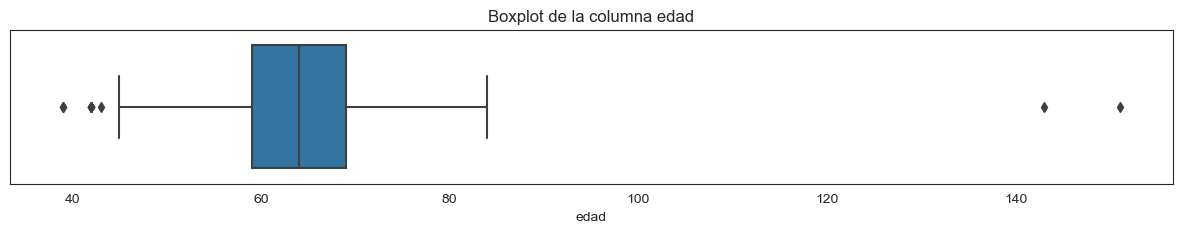

In [7]:
utils.boxplot(df, 'edad')

Claramente se observan dos valores atípicos, con edades superiores a los 140 años. Por lo tanto, se decide borrarlos y revisar nuevamente la distribución de edades.

In [8]:
# Se eliminan registros y se verifica su eliminación
df = df[df['edad'] <= 100]
(df['edad'] > 100).sum()

0

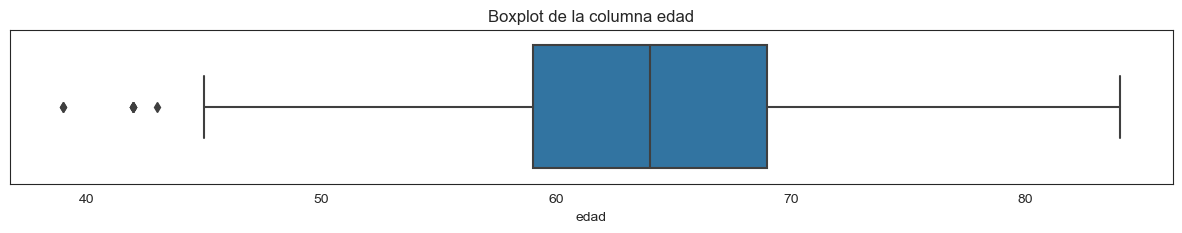

In [9]:
# Se revisa nuevamente el boxplot
utils.boxplot(df, 'edad')

In [10]:
#Estadísticas de la columna
df['edad'].describe()

count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: edad, dtype: float64

Tal como se ve en el resumen estadístico como en el boxplot, el 75% de las edades se encuentra entre los 39 y 69 años de edad, con una edad promedio de cerca de 64 años. Hay pacientes con mayor edad, llegando a los 84 años. Se aprecian tres casos de pacientes con edades atípicas por debajo de los 45 años.

#### 'psa'


count    431.000000
mean      14.295035
std       17.454666
min        0.600000
25%        5.700000
50%        8.100000
75%       16.000000
max      100.000000
Name: psa, dtype: float64


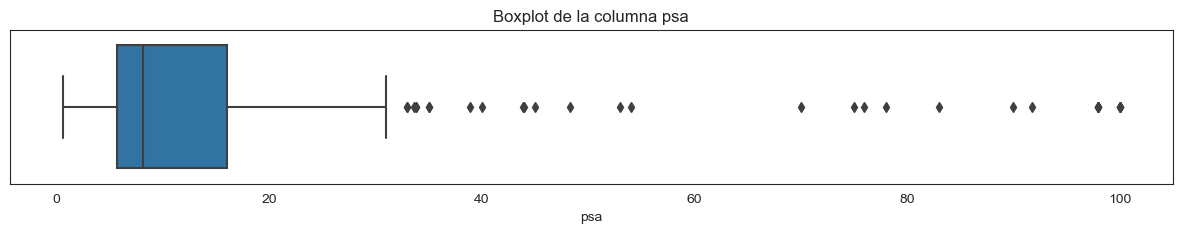

In [11]:
#Estadísticas de la columna
print(df['psa'].describe())
utils.boxplot(df,'psa')

In [12]:
# Se calcula el límite donde comienzan los valores atípicos y la cantidad
utils.bigote_max(df['psa'])

El bigote superior se ubica en: 31.45
Hay 31 valores atípicos.


El 75% de los registros tienen concentraciones por debajo de los 16 ng/ml, pero se observan 31 casos de concentraciones entre los 31,45 a 100 ng/ml.

#### 'nro_muestras'


count    431.000000
mean      12.911833
std        4.008900
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: nro_muestras, dtype: float64


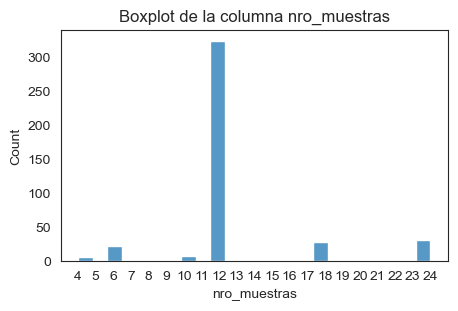

In [26]:
#Estadísticas de la columna
print(df['nro_muestras'].describe())
utils.histplot(df, 'nro_muestras', bins=24)

Se puede concluir que el 75% de los pacientes se les hicieron 12 muestras en la biopsia, mientras que al resto se les tomo como mínimo 4 muestras y hasta un maximo de 24 muestras en algunos casos.

#### 'nro_dias_con_infecc'


count    431.000000
mean       0.169374
std        0.847206
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: nro_dias_con_infecc, dtype: float64


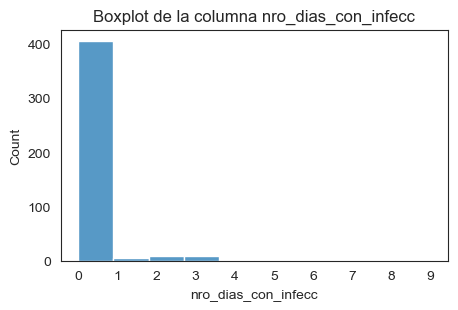

Valor mas frecuente es 0, con una cantidad de 406 y representa el 94.2%.


In [29]:
#Estadísticas de la columna
print(df['nro_dias_con_infecc'].describe())
utils.histplot(df, 'nro_dias_con_infecc')
utils.valor_mas_frecuente(df, 'nro_dias_con_infecc')

In [18]:
# Se analizan sólo los datos de pacientes que sí tienen complicaciones
con_complicaciones = (df['nro_dias_con_infecc'] > 0)
print(f'Hay {con_complicaciones.sum()} que presentaron complicaciones post la biopsia.')

Hay 25 que presentaron complicaciones post la biopsia.


Se puede concluir que 94.2% de los pacientes no tuvieron complicaciones post realizarse la biopsia. Pero de los que sí tuvieron complicaciones, manifestaron infecciones entre 1 a 9 días luego de la intervención, mayormente apareciendo entre los 2 a 3 días.

#### 'dias_hosp_mq'


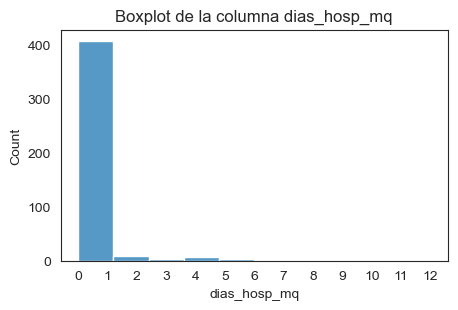

Valor mas frecuente es 0, con una cantidad de 408 y representa el 94.66%.


In [32]:
#Estadísticas de la columna
df['dias_hosp_mq'].describe()
utils.histplot(df, 'dias_hosp_mq')
utils.valor_mas_frecuente(df, 'dias_hosp_mq')

Se puede concluir que 94.66% de los pacientes no fueron hospitalizados por motivos médico/quirúrgicos, pero los que sí debieron ser hospitalizados, permanecieron entre 2 a 12 días, siendo 2 días el tiempo mas frecuente de permanencia.

#### 'dias_hosp_upc'

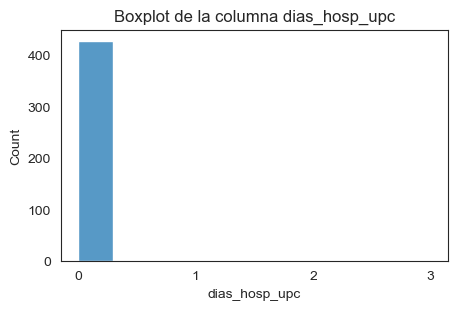

Valor mas frecuente es 0, con una cantidad de 428 y representa el 99.3%.


In [31]:
#Estadísticas de la columna
df['dias_hosp_upc'].describe()
utils.histplot(df, 'dias_hosp_upc')
utils.valor_mas_frecuente(df, 'dias_hosp_upc')

Se puede concluir que 99.3% de los pacientes no fueron hospitalizados en estado crítico, pero los que sí debieron ser hospitalizados, permanecieron entre 2 a 3 días, siendo 3 días el tiempo mas frecuente de permanencia.

### Variables cualitativas

#### 'antibiotico_en_profilaxis'


count                                431
unique                                 4
top       FLUOROQUINOLONA_AMINOGLICOSIDO
freq                                 344
Name: antibiotico_en_profilaxis, dtype: object


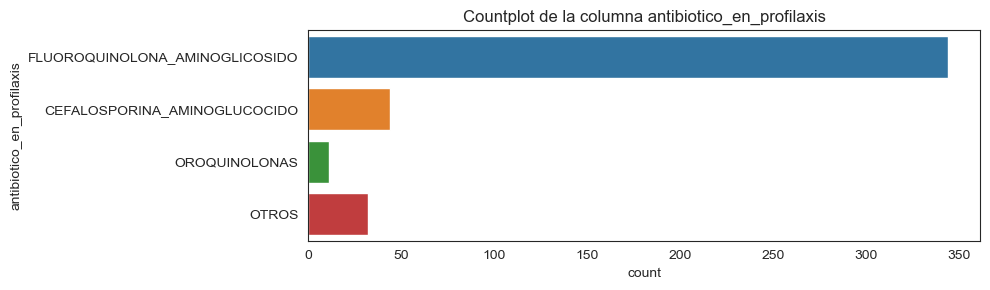

                                Porcentaje  Cantidad
FLUOROQUINOLONA_AMINOGLICOSIDO       79.81       344
CEFALOSPORINA_AMINOGLUCOCIDO         10.21        44
OTROS                                 7.42        32
OROQUINOLONAS                         2.55        11


In [37]:
#Estadísticas de la columna
print(df['antibiotico_en_profilaxis'].describe())
utils.countplot(df, 'antibiotico_en_profilaxis')
utils.resumen_categoricas(df, 'antibiotico_en_profilaxis')

Casi el 80% de los pacientes utiizaron FLUOROQUINOLONA_AMINOGLICOSIDO como antibiótico de profilaxis y en segundo lugar CEFALOSPORINA_AMINOGLUCOCIDO con el 10% de los pacientes.

#### 'biopsia'


count     431
unique      9
top       NEG
freq      211
Name: biopsia, dtype: object


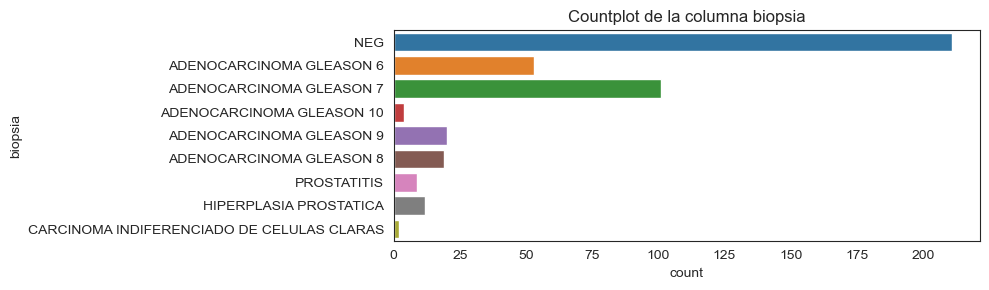

                                            Porcentaje  Cantidad
NEG                                              48.96       211
ADENOCARCINOMA GLEASON 7                         23.43       101
ADENOCARCINOMA GLEASON 6                         12.30        53
ADENOCARCINOMA GLEASON 9                          4.64        20
ADENOCARCINOMA GLEASON 8                          4.41        19
HIPERPLASIA PROSTATICA                            2.78        12
PROSTATITIS                                       2.09         9
ADENOCARCINOMA GLEASON 10                         0.93         4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS        0.46         2


In [38]:
#Estadísticas de la columna
print(df['biopsia'].describe())
utils.countplot(df, 'biopsia')
utils.resumen_categoricas(df, 'biopsia')

Casi el 49% de los resultados de la biopsia dieron negativo para cáncer prostático, pero en el 45.71% resultó en algún grado de cancer.

#### 'tipo_cultivo'


count     431
unique      4
top        NO
freq      423
Name: tipo_cultivo, dtype: object


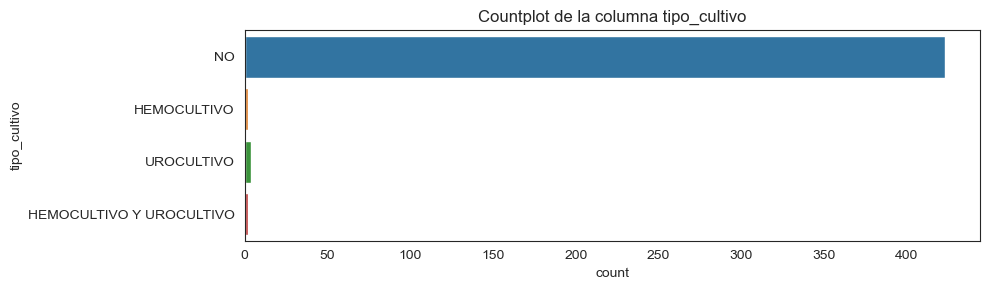

                          Porcentaje  Cantidad
NO                             98.14       423
UROCULTIVO                      0.93         4
HEMOCULTIVO                     0.46         2
HEMOCULTIVO Y UROCULTIVO        0.46         2


In [39]:
#Estadísticas de la columna
print(df['tipo_cultivo'].describe())
utils.countplot(df, 'tipo_cultivo')
utils.resumen_categoricas(df, 'tipo_cultivo')

En el 98% de los casos no se pidió ningún tipo de cultivo en análisis posterior a la intervención.

#### 'agente_aislado'


count     431
unique      3
top        NO
freq      423
Name: agente_aislado, dtype: object


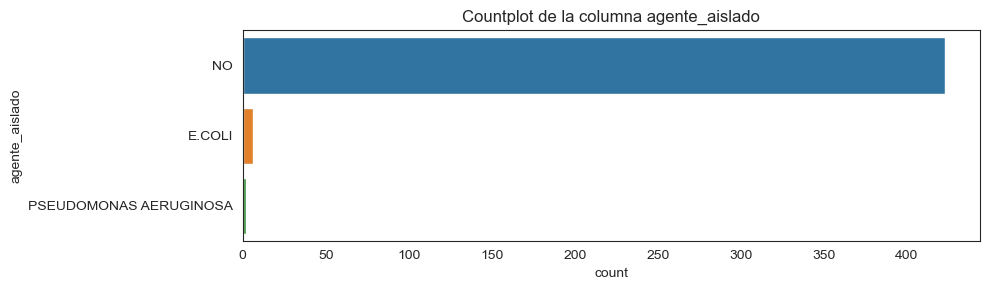

                        Porcentaje  Cantidad
NO                           98.14       423
E.COLI                        1.39         6
PSEUDOMONAS AERUGINOSA        0.46         2


In [40]:
#Estadísticas de la columna
print(df['agente_aislado'].describe())
utils.countplot(df, 'agente_aislado')
utils.resumen_categoricas(df, 'agente_aislado')

En el 98% de los pacientes no fue necesario hacer cultivo, pero en las muestras que sí se solicitaron cultivos, el agente mas encontrado fue E. Coli.

#### 'patron_resistencia'


count     431
unique      5
top        NO
freq      424
Name: patron_resistencia, dtype: object


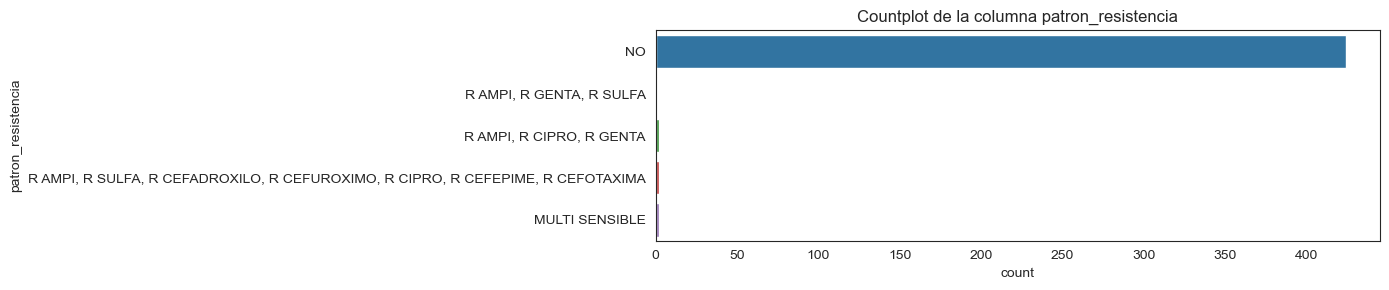

                                                    Porcentaje  Cantidad
NO                                                       98.38       424
R AMPI, R CIPRO, R GENTA                                  0.46         2
R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R...        0.46         2
MULTI SENSIBLE                                            0.46         2
R AMPI, R GENTA, R SULFA                                  0.23         1


In [42]:
print(df['patron_resistencia'].describe())
utils.countplot(df, 'patron_resistencia')
utils.resumen_categoricas(df, 'patron_resistencia')

En el 98% de los pacientes no presentó resistencia a los antibióticos.

### Comparación de categorías binarias

Para el caso de las variables 'diabetes', 'hospitaliz_ult_mes', 'biopsias_prev', 'vol_prostatico', 'cup', 'epoc', 'fiebre', 'itu' y 'hospitalizacion', al ser varibles binarias, se comparan de la siguiente manera.

In [45]:
utils.resumen_binarias(df)

,Columna,Porcentaje de Si,Cantidad de Si,Porcentaje de No,Cantidad de No
0,diabetes,11.83,51,88.17,380
1,hospitaliz_ult_mes,0.93,4,99.07,427
2,biopsias_prev,10.21,44,89.79,387
3,vol_prostatico,71.00,306,29.00,125
4,cup,0.70,3,99.30,428
5,epoc,3.25,14,96.75,417
6,fiebre,8.35,36,91.65,395
7,itu,1.39,6,98.61,425
8,hospitalizacion,5.34,23,94.66,408


In [46]:
# Se observan los casos donde sí hay hospitalizaciones
hospitalizaciones = df[df['hospitalizacion']== 'SI']
hospitalizaciones

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3
5,55,SI,SI,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3,0
6,53,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"R AMPI, R CIPRO, R GENTA",SI,3,0
7,67,NO,NO,6.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, ...",SI,2,0
8,69,NO,NO,6.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4,0
9,54,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"R AMPI, R CIPRO, R GENTA",SI,3,0


In [47]:
# Resumen de las variables numéricas
hospitalizaciones.describe()

,edad,psa,nro_muestras,nro_dias_con_infecc,dias_hosp_mq,dias_hosp_upc
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,61.652174,8.521304,14.608696,2.391304,3.956522,0.347826
std,7.474859,6.969954,4.726513,1.117592,2.754802,0.934622
min,43.000000,4.000000,12.000000,1.000000,2.000000,0.000000
25%,55.500000,4.845000,12.000000,2.000000,2.000000,0.000000
50%,64.000000,6.200000,12.000000,2.000000,3.000000,0.000000
75%,68.500000,7.350000,15.000000,3.000000,4.000000,0.000000
max,71.000000,29.000000,24.000000,5.000000,12.000000,3.000000


In [49]:
# Resumen de las variables categóricas con internación
hospitalizaciones.describe(include='object')

,diabetes,hospitaliz_ult_mes,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,cup,epoc,biopsia,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion
count,23,23,23,23,23,23,23,23,23,23,23,23,23,23
unique,2,2,2,2,3,1,1,3,2,2,4,3,5,1
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,SI,NO,NO,NO,NO,SI
freq,18,22,21,18,19,23,23,19,20,17,15,15,16,23


## Análisis de correlación

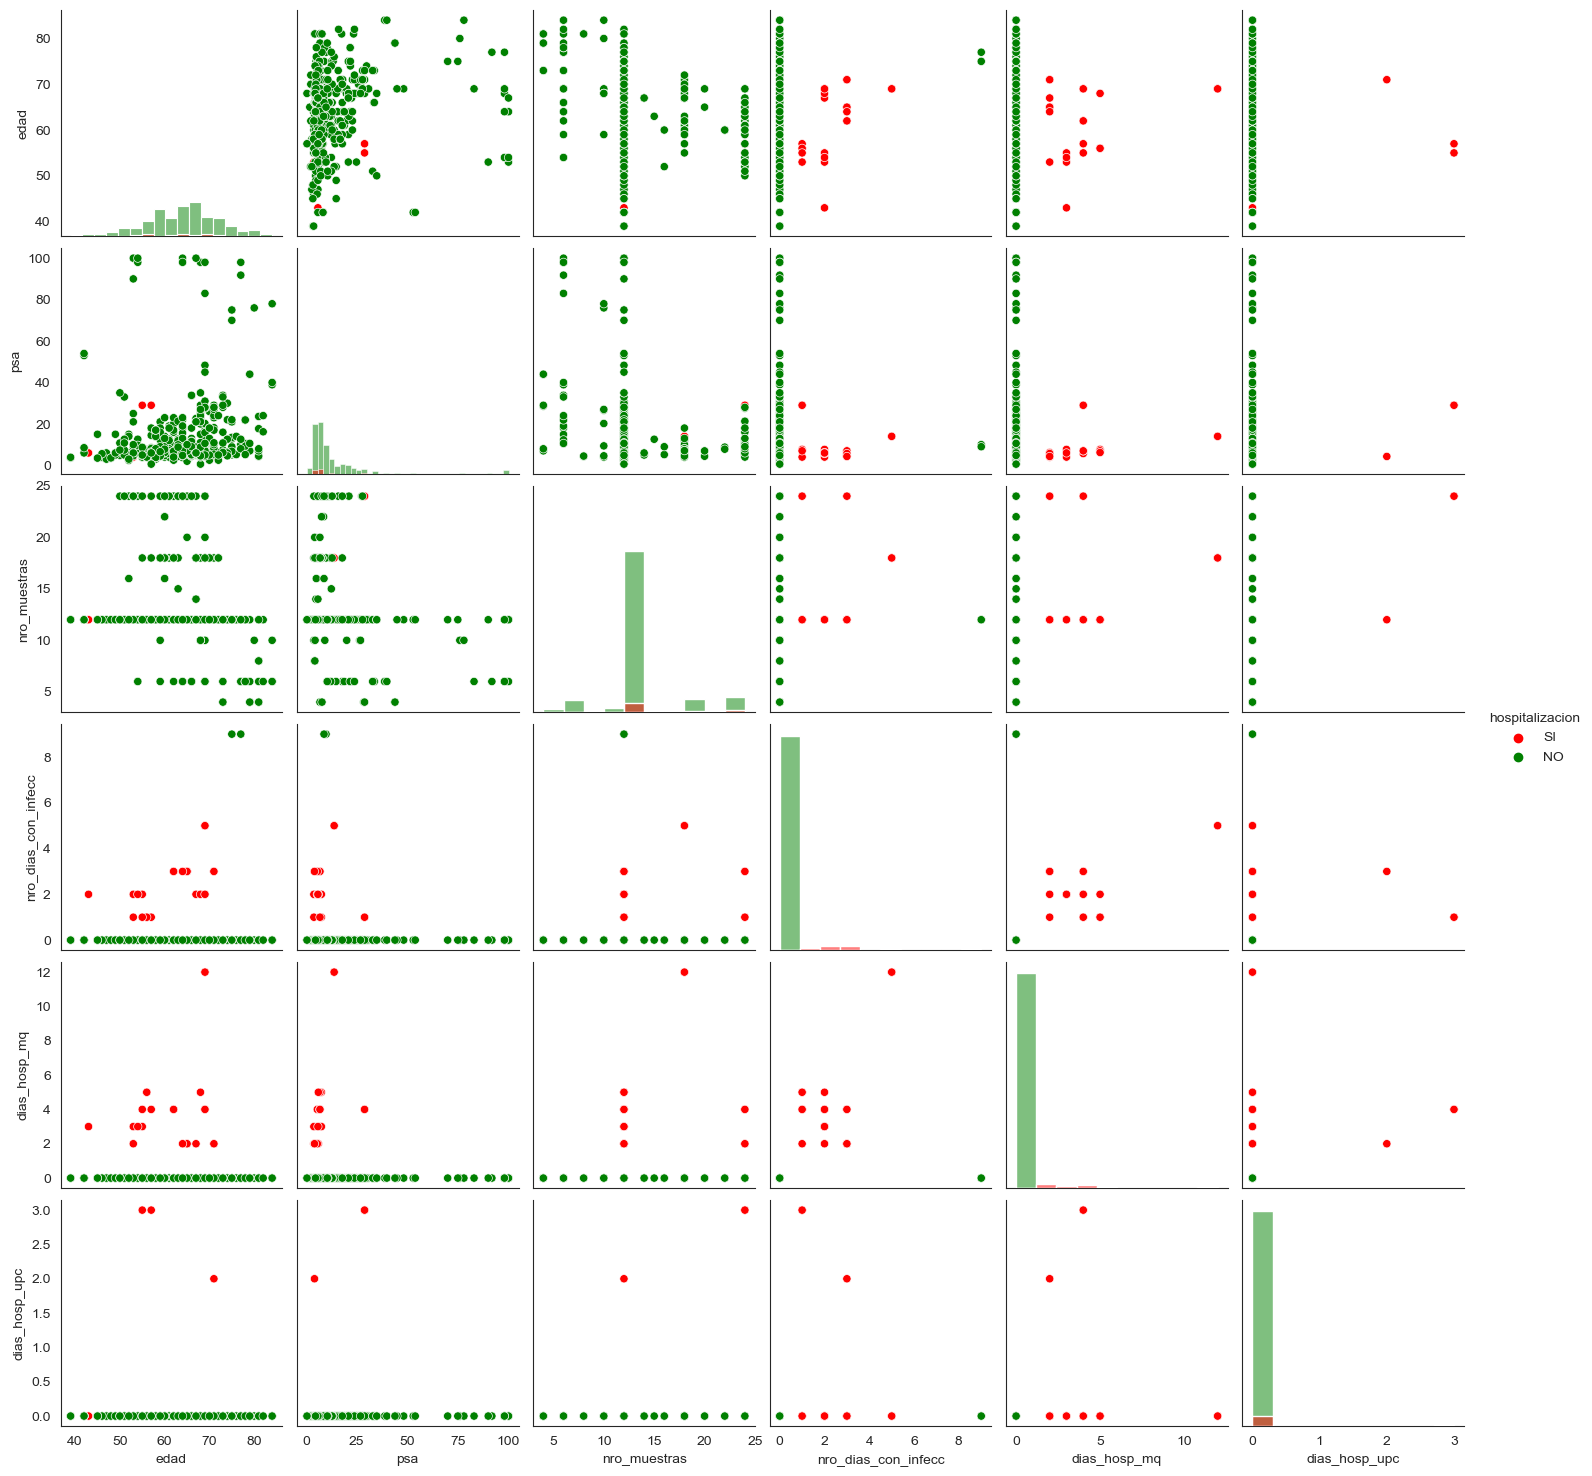

In [51]:
utils.pairplot(df, 'hospitalizacion')

En principio, no se observa relación entre las variables numéricas a excepción de las columnas dias_hosp_mq y dias_hosp_upc que tienen que ver con el tipo de hospitalización, por lo que se decide eliminar estas columnas del análisis.

In [56]:
columnas_a_eliminar = ['dias_hosp_mq','dias_hosp_upc']
df = df.drop(columns=columnas_a_eliminar)
df.columns

Index(['edad', 'diabetes', 'hospitaliz_ult_mes', 'psa', 'biopsias_prev',
       'vol_prostatico', 'antibiotico_en_profilaxis', 'nro_muestras', 'cup',
       'epoc', 'biopsia', 'nro_dias_con_infecc', 'fiebre', 'itu',
       'tipo_cultivo', 'agente_aislado', 'patron_resistencia',
       'hospitalizacion'],
      dtype='object')

Se proponen categorizar algunas de las variables numéricas que podrían ser importantes con el fin de encontrar relaciones con la hospitalización. Por ejemplo:

* Para **edad** se consideran los rangos:
    - menor de 65 años
    - mayor o igual a 65 años
    Teniendo en cuenta que la mediana de los pacientes es de 64 años.
* Para **psa** se consideran los rangos:
    - menor o igual a 4 ng/ml
    - entre 4 y 31 ng/ml
    - mayor o igual a 31 ng/ml
    Teniendo en cuenta que en general 4 ng/ml o menos se consideran normales y que 31 ng/ml se observó como el límite superior para determinar valores atípicos.

In [66]:
cat_edad = [0, 65, float('inf')]
edad_etiquetas = ['menor_65', 'mayor_65']
df['edad_categorizada'] = pd.cut(df['edad'], bins=cat_edad, labels=edad_etiquetas)

cat_psa = [0., 4., 31., float('inf')]
psa_etiquetas = ['menor_4', 'entre_4_31', 'mayor_31']
df['psa_categorizada'] = pd.cut(df['psa'], bins=cat_psa, labels=psa_etiquetas)

df.head(3)

,edad,diabetes,hospitaliz_ult_mes,psa,biopsias_prev,vol_prostatico,antibiotico_en_profilaxis,nro_muestras,cup,epoc,biopsia,nro_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,edad_categorizada,psa_categorizada
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,menor_65,menor_4
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,menor_65,entre_4_31
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,menor_65,entre_4_31


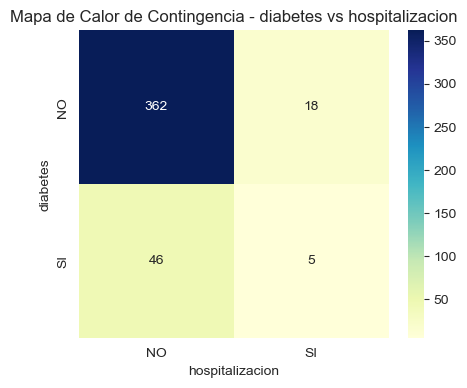

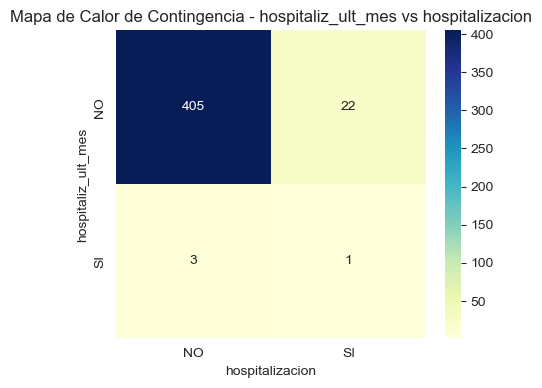

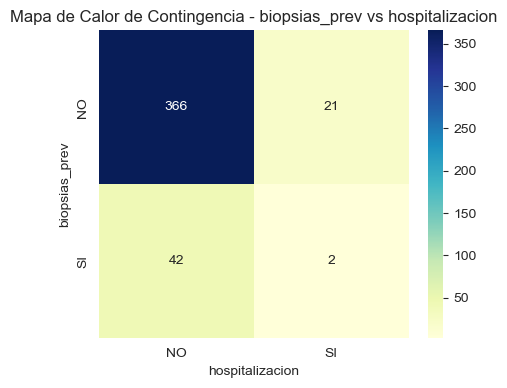

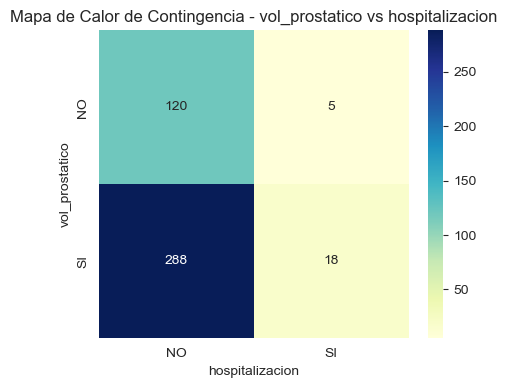

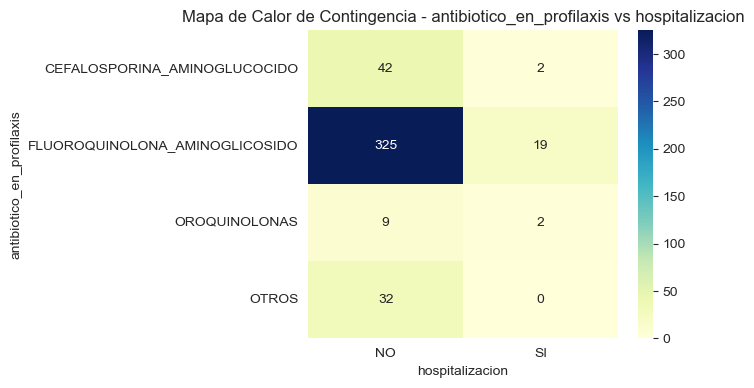

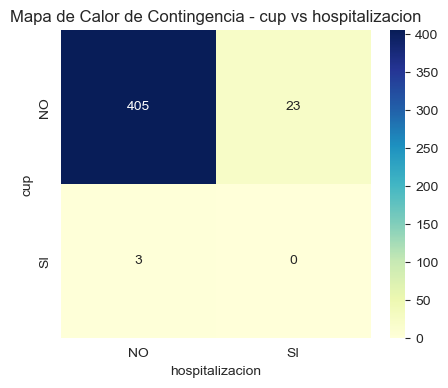

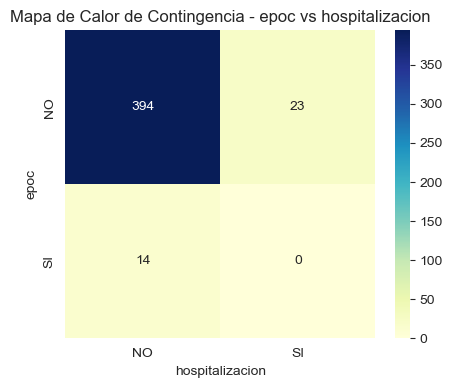

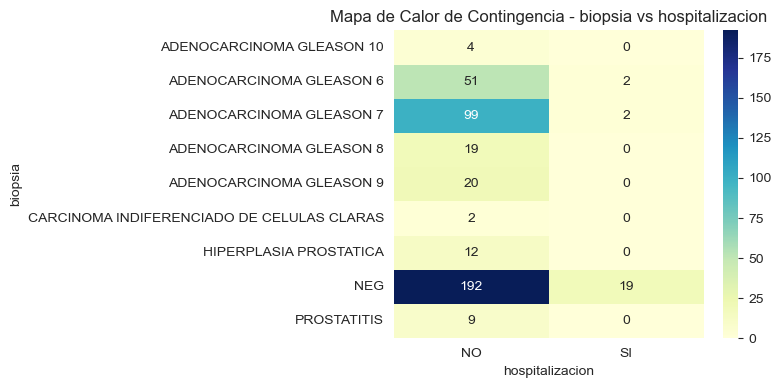

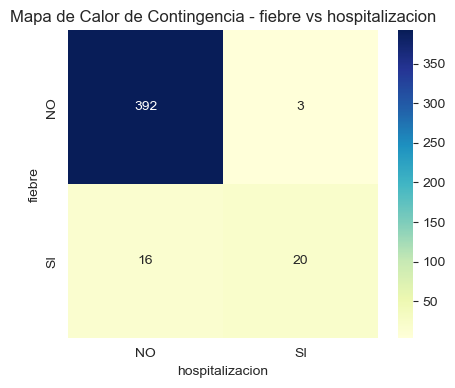

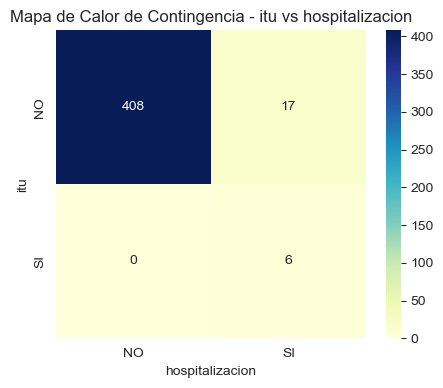

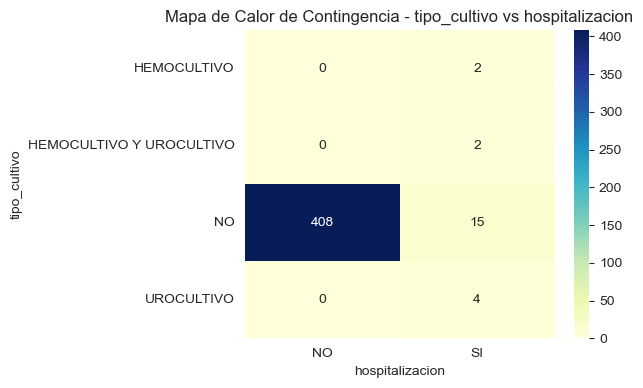

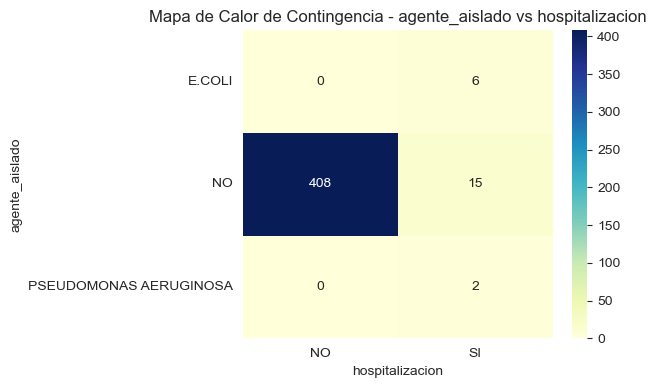

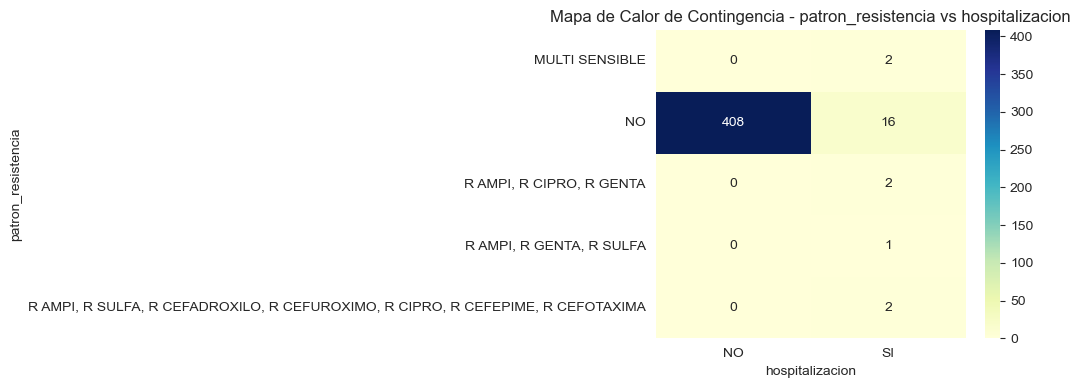

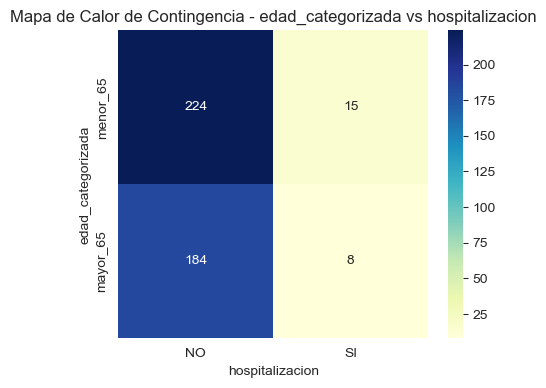

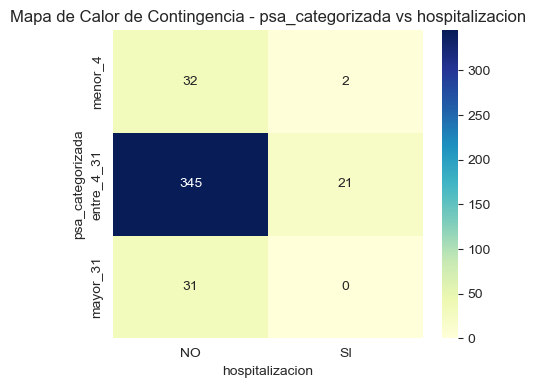

In [68]:
utils.tabla_contingencias(df, 'hospitalizacion')

De las tablas de contingencia se encuentra que:
* 18 de los 23 hospitalizados no presenta diabetes como cormobilidad
* 18 de los 23 hospitalizados presentó un volumne prostático superior a los 40 $cm^3$
* 19 de los 23 hospitalizados utilizó Fluoroquinolona_anglicosido como antibiótico de profilaxis
* En ningún caso donde se uso de cateter urinario durante la intervención terminó en internación
* En ningún caso donde el paciente presenta una de enfermedades pulmonares crónicas terminó en internación
* 19 de los 23 hospitalizados dieron negativo a la biopsia, por lo que un resultado negativo no excluye de la hospitalización
* 20 de los 23 hospitalizados presentó fiebre luego de la intervención
* solo 6 de los 23 hospitalizados presentaron infección en el tracto urinario
* El tipo de cultivo en los exámenes cuando se tiene una complicación infecciosa no arrojaría infromación útil relacionada con la hospitalización, así como el agente ailado en dicho cultivo.
* El patrón de resistencia a los antibióticos tampoco mustra relación con las internaciones, dado que 16 de los 23 hospitalizados no presentan resistencia a ningún antibiótico.
* La edad avanzada no pareciera ser determinante para la hozpitalización, dado que 15 de los 23 hospitalizados fueron menores de 65 años.
* En el mismo sentido, concentraciones atípicas no determinan la internación dado que ninguno de los casos con psa superior a los 31 fue hospitalizado y 21 de los 23 hospitalizados presentarion concentraciones entre los 4 y 31 ng/ml.

## Conclusiones

Luego de analizar exaustivamente el conjunto de datos, se puede extraer las siguientes conclusiones:

* Luego de la limpieza, el conjunto de datos quedó con 431 registros de pacientes que fueron sometidos a una biopsia prostática.
* Se cuenta con 18 variables origuinales (dos fueron eliminadas) y se categorizaron la edad y psa.
* Del total de registros, 23 son pacientes que fueron hospitalizados luego de la intervención.
* Los pacientes tienen edades entre los 39 y los 84 años, con una media de 63 años. Se observó en relación con la hospitalización que la edad avanzada no estaría relacionada con la internación, dado que la mayoría de los internados fueron menores de 65 años.
* El 75% de los pacientes presentaron concentraciones de psa en sangre menores que 16 ng/ml y 31 de los pacientes registrados presentó concentraciones atípicas por sobre los 31 ng/ml. Sin embargo, estas concentraciones atípicas no se relacionarían con la hospitalización, porque ninguno de estos casos resultó hispitalizado. La mayoría de los hospitalizados presentó concentraciones entre los 4 y 31 ng/ml.
* En el 75% de los pacientes se tomaron entre 4 y 12 muestras, aunque esto no estaría relacionado con la hospitalización, según se vio en el pairplot.
* El 94% de los pacientes no presentaron infección luego de la intervención, pero los que sí tuvieron alguna complicación, permanecieron entre 2 a 9 días hospitalizados.
* En casi el 80% de los pacientes se les suministró Fluoroquinolona_anglicosido como antibiótico de profilaxis y 19 de los 23 hospitalizados consumió dicho antibiótico.
* El 46% de los pacientes resultaron con algún grado de cancer en el resultado de la biopsia, no obstante, la ausencia de diagnóstico (es decir, resultado negativo) no excluye la hospitalización dado que 19 de los 23 fueron hospitalizados.
* El tipo de cultivo en los pacientes con alguna complicación infecciosa no arrojaría información útil en cuando a los casos de internación, al igual que el agente aislado, dado que la mayoría de los internados no realizaron cultivos.
* En ningún caso de los hospitalizados se utilizó cateter urinario durante la intervención
* La existencia de epoc como morbilidad no estaría relacionada a la hospitalización, dado que ninguno de los hospitalizados la padece.
* La fiebre estuvo presente en 20 de los 23 casos hospitalizados.
* La resistencia a los antibióticos no pareciera estar relacionada con las hospitalizaciones, dado que 16 de los 23 hospitalizados no presentaron ningún tipo de resistencia.
* El volumen prostático podría estar relacionado con la hospitalización, dado que 18 de los 23 hospitalizados presentaron un volumen prostático mayor a los 40 $cm^3$.
* La preexitencia de diabetes en los pacientes pareciera no estar relacionado con la hospitalización dado que 18 de los 23 hospitalizados no presentaba esta morbilidad.

Finalmente, las variables que podrían ayudar a la predicción la hospitalización de un paciente luego de una biopsia prostática serían: edad, psa, fiebre, volumen prostático.